True
['passengerid', 'age', 'fare', 'sex', 'sibsp', 'parch', 'class', 'embarked', 'survived']


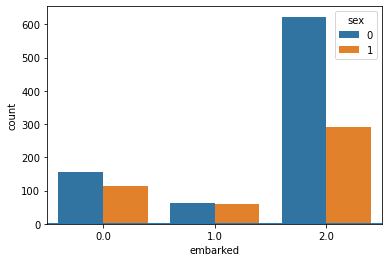

In [53]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

rough_df = pd.read_csv('titanic.csv')

rough_df.rename(columns={'2urvived': 'survived', 'Embarked': 'embarked', 'Pclass': 'class', 'Parch':'parch', 'Sex':'sex', 'Fare':'fare', 'Age': 'age', 'Passengerid': 'passengerid'}, inplace=True)
rough_df = rough_df[rough_df.columns.drop(list(rough_df.filter(regex='zero(\.)?(\d*)?')))]
headers = rough_df.columns.to_list()
rough_df['sex'].map({'male':0, 'female':1})
sns.kdeplot(data=rough_df, x='age')
sns.countplot(x='embarked', hue='sex', data=rough_df)

rough_df['age'].fillna(value=np.mean(rough_df.age), inplace=True)
rough_df['first'] = rough_df['class'].apply(lambda x: 1 if x == 1 else 0)
rough_df['second'] = rough_df['class'].apply(lambda x: 1 if x == 2 else 0)
rough_df['third'] = rough_df['class'].apply(lambda x: 1 if x == 3 else 0)

#print(rough_df.head())
print(rough_df['embarked'].isna().values.any())
print(headers)
#print(np.mean(rough_df['age']))



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = rough_df[['age', 'first', 'second', 'third', 'sex',]].copy()
features.dropna(axis=0, how='any', inplace=True)
print(features.isna().values.any())
label = rough_df[['survived']].copy()

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
y_train_norm = scaler.fit_transform(y_train)




False


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)
print(list(zip(['age', 'first', 'second', 'third', 'sex'],model.coef_[0])))

[('age', -0.02244731144222467), ('first', 0.6958107829453939), ('second', 0.011025360823137511), ('third', -0.7071286299474927), ('sex', 1.9311293297530228)]


/Users/michaelspehlmann/opt/anaconda3/envs/travel_delays/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
jack = np.array([20, 0.0, 0.0, 1.0, 0.0])
rose = np.array([17.0, 1.0, 0.0, 0.0, 0.0])
me = np.array([30, 0.0, 0.0, 1.0, 0.0])
fun = np.array([jack, rose, me])
fun_scaled = scaler.fit_transform(fun)
model.predict(fun_scaled)
model.predict_proba(fun_scaled)


/Users/michaelspehlmann/opt/anaconda3/envs/travel_delays/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/michaelspehlmann/opt/anaconda3/envs/travel_delays/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.89025182, 0.10974818],
       [0.29010282, 0.70989718],
       [0.89413621, 0.10586379]])